In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import Image

sns.set(rc = {'figure.figsize':(10, 6)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
import os

os.makedirs("images", exist_ok=True)

In [11]:
df = pd.read_csv('mfsnowcrab.csv')

# Columns in dataset
- latitude: The latitude (decimal degrees) at the start of the haul.
- longitude: The longitude (decimal degrees) at the start of the haul.
- year: Year specimen was collected.
- name: The common name of the marine organism associated with the scientific name.
- sex: Gender of crab.
- bottom_depth: Meters (m). Weighted average depth (m) and is calculated by adding gear depth to net height.
- surface_temperature: Surface temperature, in tenths of a degree, Celsius.
- bottom_temperature: Average temperature (in tenths of a degree Celsius) measured at the maximum depth of the trawl.
- haul: This number uniquely identifies a haul within a cruise. It is a sequential number, in chronological order of occurrence.
- cpue: Catch per unit effort. Catch number per area the net swept in number/square nautical mile.

In [12]:
df.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  
0                  9.1                 1.1   117   40356  
1                  8.7                 1.4   118   68691  
2                  8.8                 1.6   139  119748  
3                  6.1                 2.5    89    7882  
4                  5.7                 2.1    90   11258

In [13]:
df.shape

(17927, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17927 non-null  int64  
 1   latitude             17927 non-null  float64
 2   longitude            17927 non-null  float64
 3   year                 17927 non-null  int64  
 4   name                 17927 non-null  object 
 5   sex                  17927 non-null  object 
 6   bottom_depth         17927 non-null  int64  
 7   surface_temperature  17927 non-null  float64
 8   bottom_temperature   17927 non-null  float64
 9   haul                 17927 non-null  int64  
 10  cpue                 17927 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


In [15]:
df.describe().style.background_gradient()

# Eastern Bering Sea Snow Crab Distribution Map
***

**Isolate male or female for gender specific trends.**

In [18]:
figmap = px.scatter_geo(df, lat = "latitude", lon = "longitude",
                     color = "sex", size = "cpue", opacity = 0.5,
                     hover_name = "name",
                     hover_data = ["bottom_depth", "surface_temperature", "bottom_temperature"],
                     animation_frame = "year",
                     color_discrete_map = {"male":"#0000DC", "female":"#DC0000"},
                     width = 950, height = 650, projection = "aitoff")

figmap.update_geos(
    resolution = 50, fitbounds = "locations", framecolor = "#FFFFFF",
    showcoastlines = True, coastlinecolor = "#FFFFFF",
    showland = True, landcolor = "#005000",
    showocean = True, oceancolor = "#000000",
    showlakes = True, lakecolor = "#005AA8",
    showrivers = True, rivercolor = "#005AA8",
    showsubunits = True, subunitcolor = "#000000",
)

figmap.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
figmap.show()

figmap.write_image("figmap.png")
figmap.write_image("images/figmap.png")
Image("figmap.png")

# Bottom Depth and Location - Male and Female Snow Crab

In [37]:
fig = px.scatter_3d(df, x = "longitude", y = "latitude", z = "bottom_depth",
                    range_x = (-160, -180), range_y = (55, 63), range_z = (200, 0),
                    color = "sex", color_discrete_map = {"male":"#0000DC", "female":"#DC0000"},
                    animation_frame = "year", opacity = 0.5)

fig.update_traces(marker = dict(size = 3))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

# Total Snow Crab Density

In [38]:
fig = px.density_contour(df, x = "longitude", y = "latitude", title = "Total Snow Crab Density")

fig.update_traces(contours_coloring = "fill", contours_showlabels = True)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 16))
fig.show()

# Male Snow Crab Density

In [39]:
df0 = df[df["sex"] == "male"]

plt.style.use("dark_background")
plt.figure(figsize = (16, 8))

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 46, cmap = "magma")

plt.colorbar(label = "Male Snow Crab Density", orientation = "vertical")
plt.title("Male Snow Crab Density", fontsize = 25)

Text(0.5, 1.0, 'Male Snow Crab Density')

# Female Snow Crab Density

In [40]:
df0 = df[df["sex"] == "female"]

plt.style.use("dark_background")
plt.figure(figsize = (16, 8))

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 46, cmap = "magma")

plt.colorbar(label = "Female Snow Crab Density", orientation = "vertical")
plt.title("Female Snow Crab Density", fontsize = 25)

Text(0.5, 1.0, 'Female Snow Crab Density')

# Ocean Depth (Bottom Depth)

In [41]:
fig = px.bar(df, x = "bottom_depth", range_x = [30, 175], y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Ocean Depth (Meters)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [42]:
fig = px.density_heatmap(df, x = "year", y = "bottom_depth", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Ocean Depth (Meters)")

fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

In [43]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "bottom_depth", 
             title = "Male Snow Crab Density by Ocean Depth (Meters)")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

In [44]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "bottom_depth", 
             title = "Female Snow Crab Density by Ocean Depth (Meters)")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Ocean Depth (Meters)')

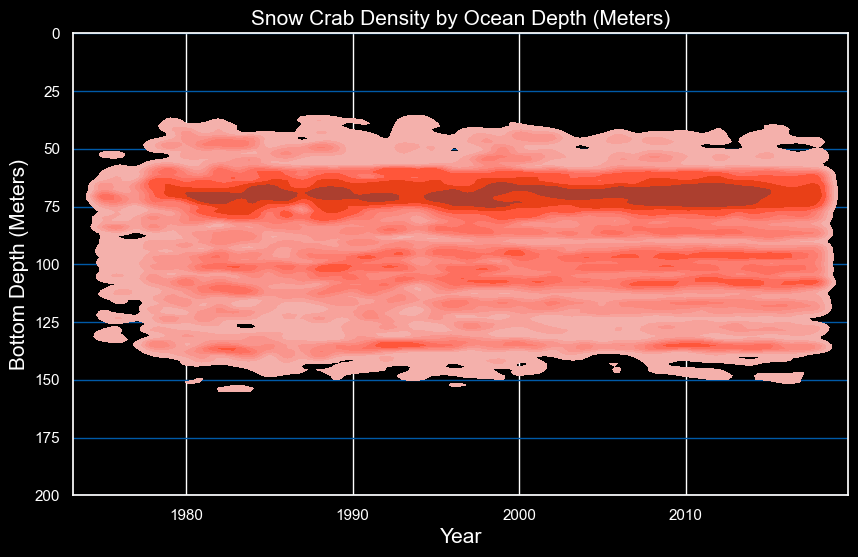

In [45]:
sns.kdeplot(data = df, x = "year", y = "bottom_depth", color = "#FF4100", fill = True, bw_adjust = .25)

plt.ylim(0, 200)
plt.ylim(reversed(plt.ylim()))
plt.grid(axis = "y", color = "#005AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Bottom Depth (Meters)", fontsize = 15)
plt.title("Snow Crab Density by Ocean Depth (Meters)", fontsize = 15)

# Ocean Surface Temperature (Celsius)

In [46]:
fig = px.bar(df, x = "surface_temperature", y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Ocean Surface Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [47]:
fig = px.density_heatmap(df, x = "year", y = "surface_temperature", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Ocean Surface Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [57]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "surface_temperature", 
             title = "Male Snow Crab Density by Surface Temperature (Celsius)")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [49]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "surface_temperature", 
             title = "Female Snow Crab Density by Surface Temperature (Celsius)")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Ocean Surface Temperature (Celsius)')

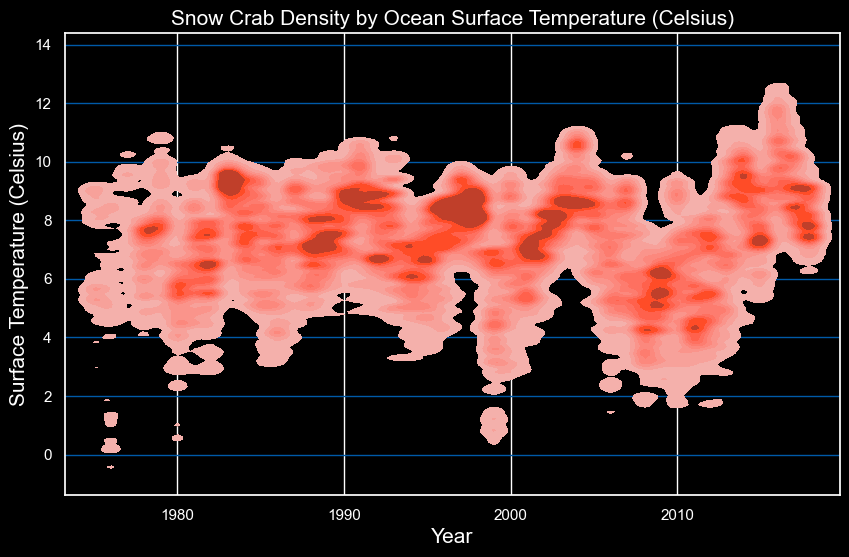

In [50]:
sns.kdeplot(data = df, x = "year", y = "surface_temperature", color = "#FF4100", fill = True, bw_adjust = .25)

plt.grid(axis = "y", color = "#005AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Surface Temperature (Celsius)", fontsize = 15)
plt.title("Snow Crab Density by Ocean Surface Temperature (Celsius)", fontsize = 15)

# Bottom Temperature (Celsius)

In [51]:
fig = px.bar(df, x = "bottom_temperature", range_x = [-2.5, 6.5], y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Bottom Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [52]:
fig = px.density_heatmap(df, x = "year", y = "bottom_temperature", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Bottom Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [53]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "bottom_temperature", 
             title = "Male Snow Crab Density by Bottom Temperature (Celsius)")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [54]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "bottom_temperature", 
             title = "Female Snow Crab Density by Bottom Temperature (Celsius)")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Bottom Temperature (Celsius)')

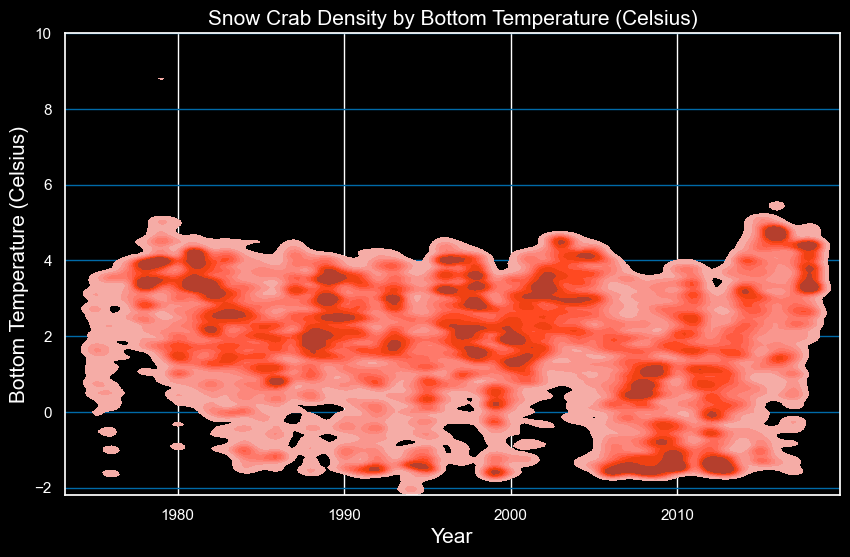

In [55]:
sns.kdeplot(data = df, x = "year", y = "bottom_temperature", color = "#FF4100", fill = True, bw_adjust = .25)

plt.ylim(-2.2, 10)
plt.grid(axis = "y", color = "#006AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Bottom Temperature (Celsius)", fontsize = 15)
plt.title("Snow Crab Density by Bottom Temperature (Celsius)", fontsize = 15)

# Catch Per Unit Effort by Year

In [56]:
fig = px.bar(df, x = "year", y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Year")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()